Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Importing data from kaggle

In [2]:
# importing the data from csv file to pandas dataframe
data = pd.read_csv('House Price Prediction.csv')

In [3]:
print(data)

      Living Area  Bathrooms  Bedrooms  Lot Size  Age  Fireplace    Price
0           1.982        1.0         3      2.00  133          0  14.2212
1           1.676        1.5         3      0.38   14          1  13.4865
2           1.694        2.0         3      0.96   15          1  11.8007
3           1.800        1.0         2      0.48   49          1  13.8297
4           2.088        1.0         3      1.84   29          1  12.9470
...           ...        ...       ...       ...  ...        ...      ...
1042        1.802        2.0         4      0.97   56          1  10.7695
1043        3.239        3.5         4      2.50    1          1  23.6737
1044        1.440        2.0         2      0.61   66          1  15.4829
1045        2.030        2.5         3      1.00    3          1  17.9492
1046        2.097        2.5         3      1.93   10          1  18.9108

[1047 rows x 7 columns]


In [4]:
#printing the first 5 rows of the dataframe
data.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


In [5]:
#printing the last 5 rows of the dataframe
data.tail()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
1042,1.802,2.0,4,0.97,56,1,10.7695
1043,3.239,3.5,4,2.50,1,1,23.6737
1044,1.440,2.0,2,0.61,66,1,15.4829
1045,2.030,2.5,3,1.00,3,1,17.9492
1046,2.097,2.5,3,1.93,10,1,18.9108


In [6]:
# to find some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Living Area  1047 non-null   float64
 1   Bathrooms    1047 non-null   float64
 2   Bedrooms     1047 non-null   int64  
 3   Lot Size     1047 non-null   float64
 4   Age          1047 non-null   int64  
 5   Fireplace    1047 non-null   int64  
 6   Price        1047 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 57.4 KB


In [7]:
#to find the number of rows and columns
data.shape

(1047, 7)

In [8]:
# to check the number of missing values in each column
data.isnull().sum()

Living Area    0
Bathrooms      0
Bedrooms       0
Lot Size       0
Age            0
Fireplace      0
Price          0
dtype: int64

Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_6664\4003340619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age)


<Axes: xlabel='Age', ylabel='Density'>

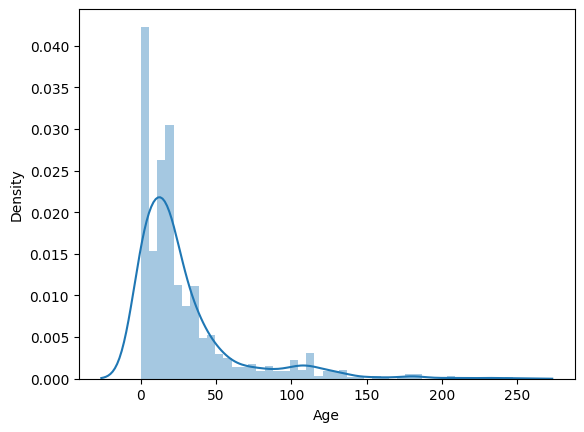

In [9]:
sns.distplot(data.Age)

C:\Users\hp\AppData\Local\Temp\ipykernel_6664\2376292096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Lot Size'])


<Axes: xlabel='Lot Size', ylabel='Density'>

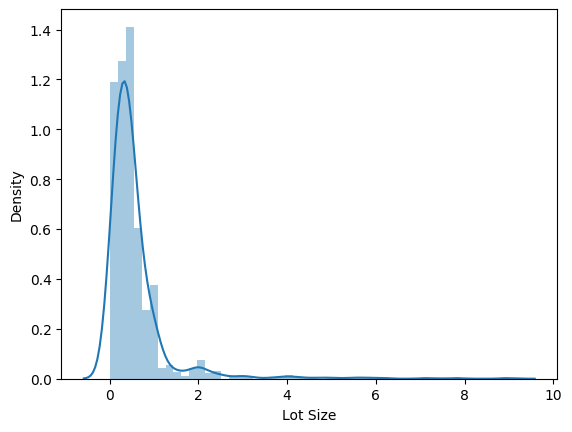

In [10]:
sns.distplot(data['Lot Size'])

C:\Users\hp\AppData\Local\Temp\ipykernel_6664\4013582559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Living Area'])


<Axes: xlabel='Living Area', ylabel='Density'>

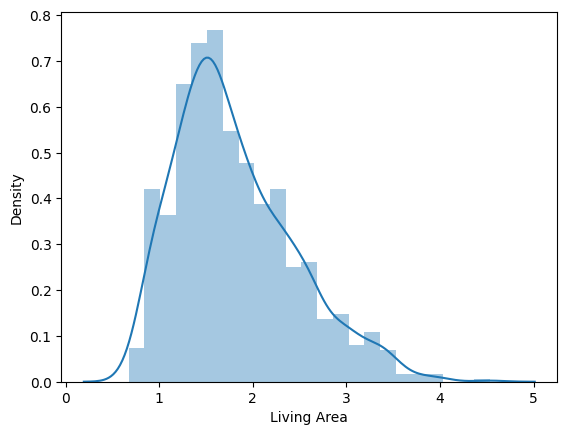

In [11]:
sns.distplot(data['Living Area'])

<Axes: >

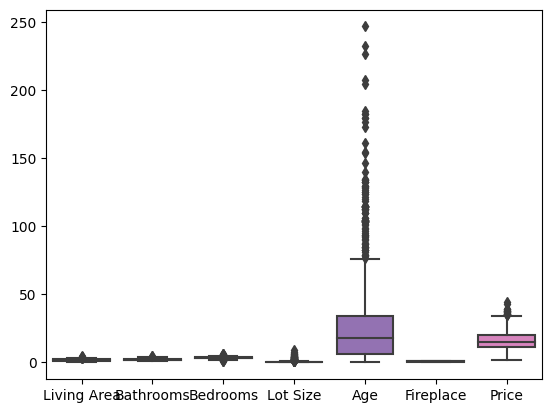

In [12]:
d=data.drop(['Age','Price'], axis=1)
sns.boxplot(data=data, orient='v')

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


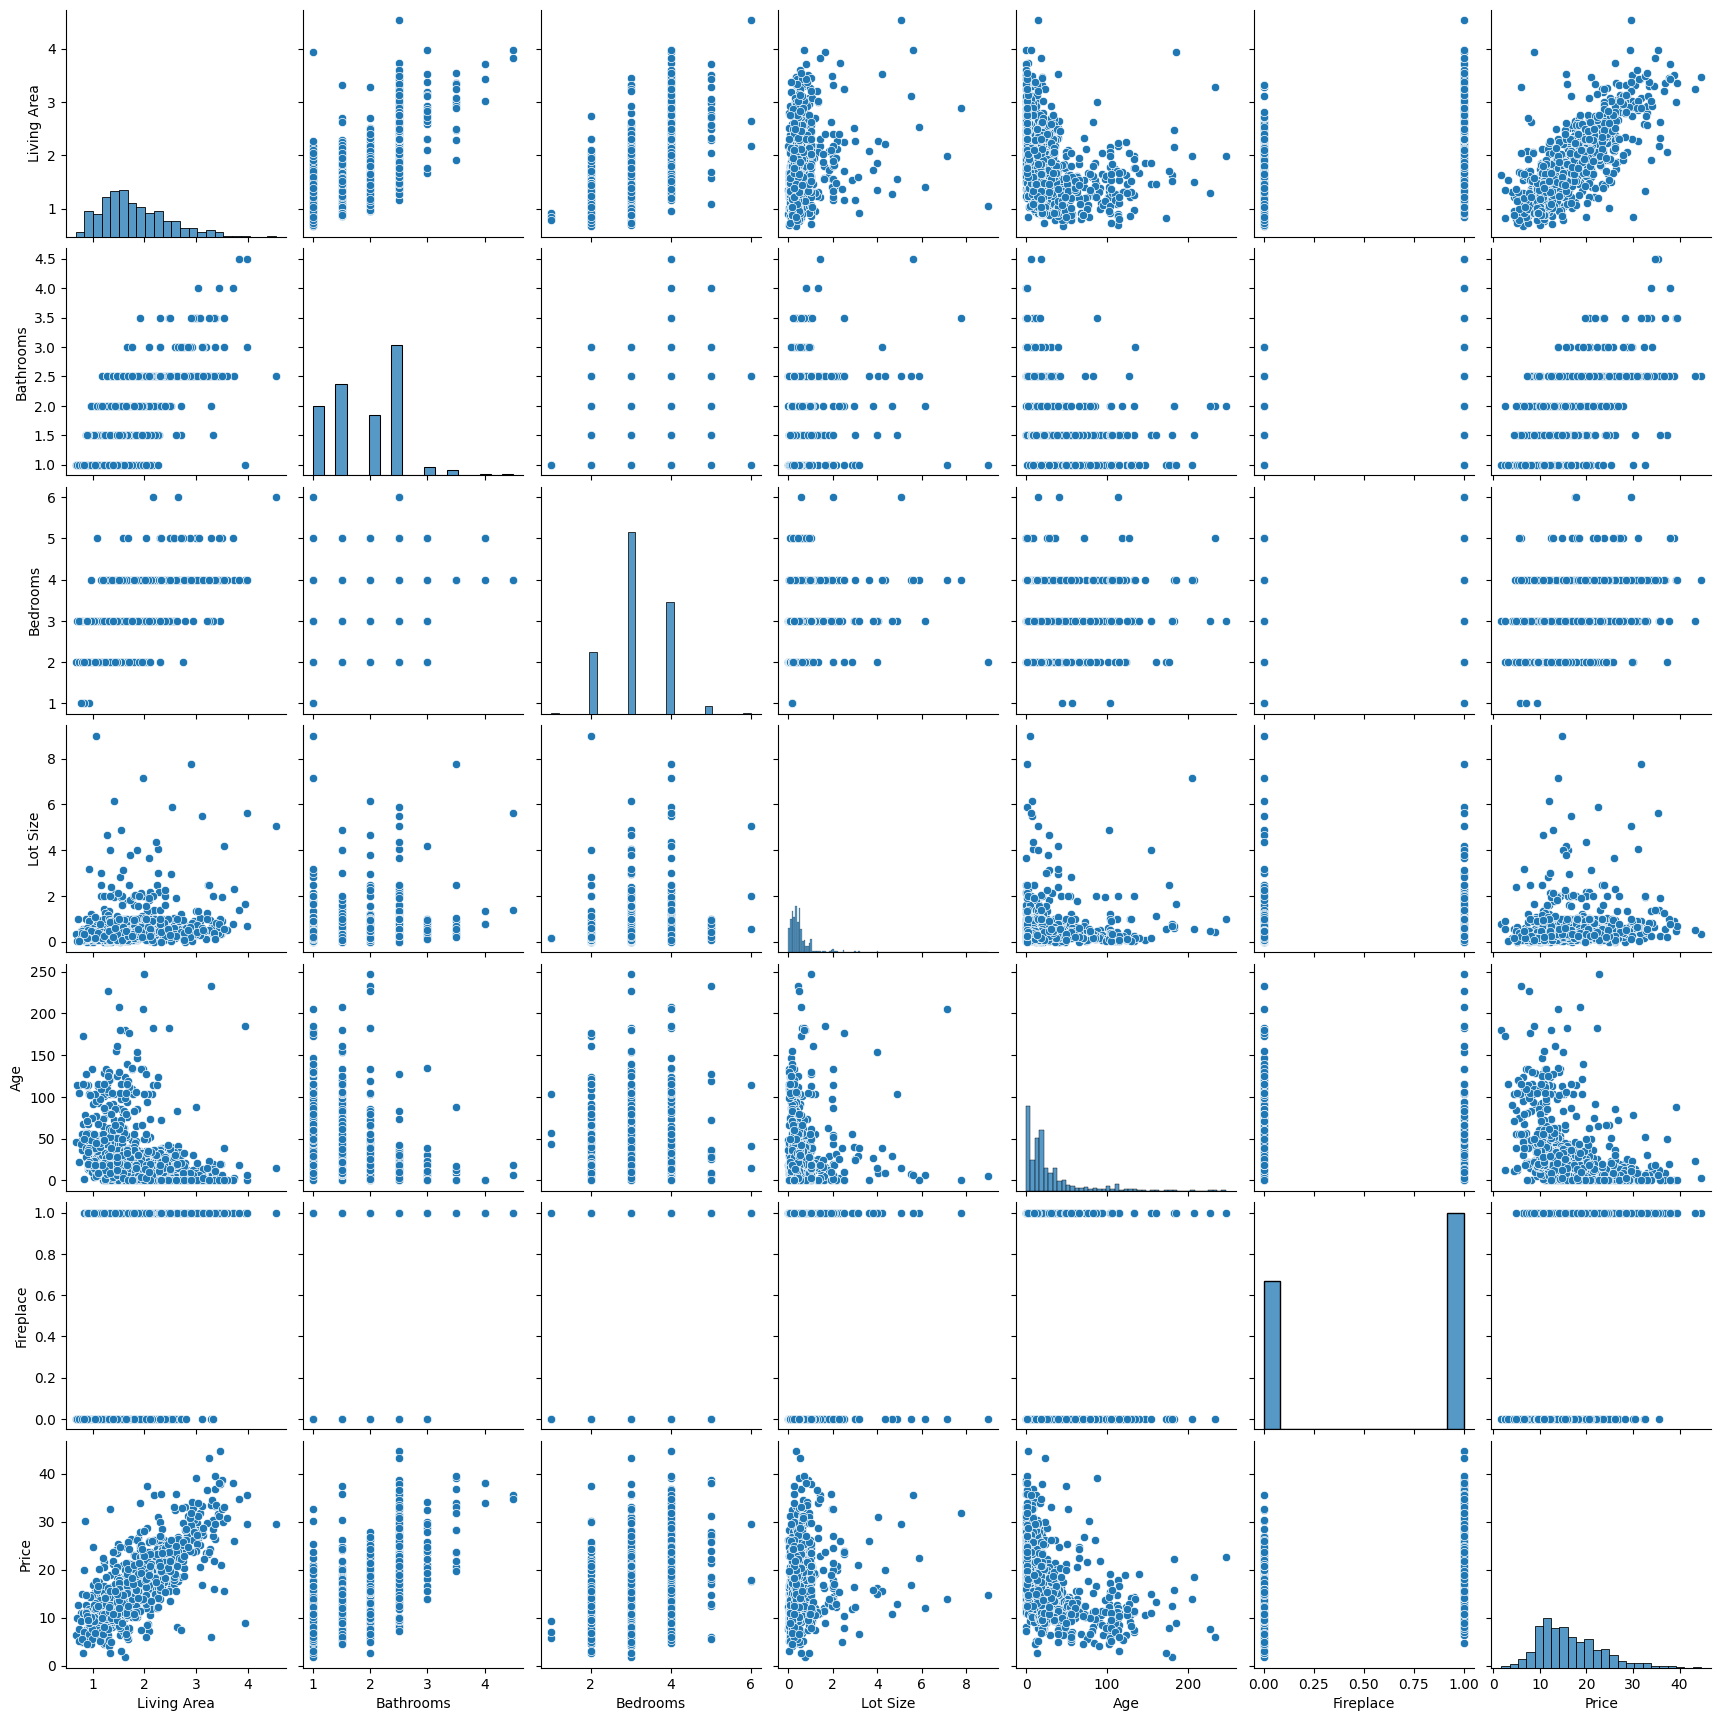

In [14]:
d=data.drop(['Age','Lot Size','Living Area'], axis=1)
g=sns.pairplot(data=data)

In [15]:
correlation = data.corr()

<Axes: >

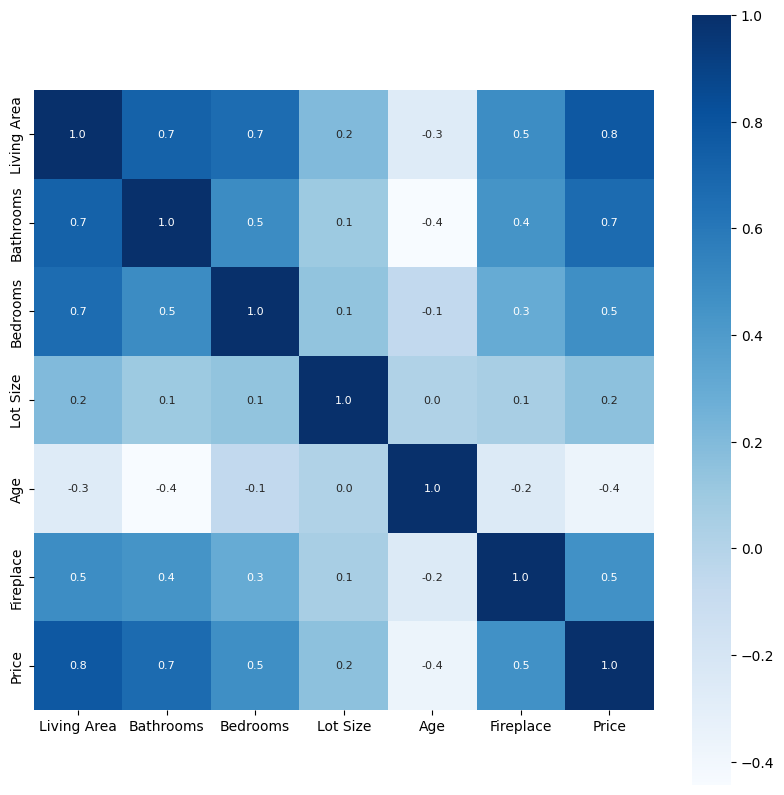

In [16]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data into features and targets

In [17]:
x = data.drop(['Price'],axis = 1)
y = data['Price']

In [18]:
print(x)

      Living Area  Bathrooms  Bedrooms  Lot Size  Age  Fireplace
0           1.982        1.0         3      2.00  133          0
1           1.676        1.5         3      0.38   14          1
2           1.694        2.0         3      0.96   15          1
3           1.800        1.0         2      0.48   49          1
4           2.088        1.0         3      1.84   29          1
...           ...        ...       ...       ...  ...        ...
1042        1.802        2.0         4      0.97   56          1
1043        3.239        3.5         4      2.50    1          1
1044        1.440        2.0         2      0.61   66          1
1045        2.030        2.5         3      1.00    3          1
1046        2.097        2.5         3      1.93   10          1

[1047 rows x 6 columns]


In [19]:
print(y)

0       14.2212
1       13.4865
2       11.8007
3       13.8297
4       12.9470
         ...   
1042    10.7695
1043    23.6737
1044    15.4829
1045    17.9492
1046    18.9108
Name: Price, Length: 1047, dtype: float64


Splitting the data into training and testing data

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size = 0.2)

Defining the Model we are using, for this case, we'll define Linear Regression Model

In [21]:
#Model Training
lr=LinearRegression()
lr.fit(x_train,y_train)
print("coefficients are ",lr.coef_,"intercept is ", lr.intercept_)
print()
print('r2 score for training data: ',r2_score(y_train, lr.predict(x_train)))
print('r2 score for testing data: ',r2_score(y_test, lr.predict(x_test)))

coefficients are  [ 6.71721488  1.60455834 -0.5251572   0.15738435 -0.02429151  0.87455794] intercept is  2.945629895983645

r2 score for training data:  0.6493220976036876
r2 score for testing data:  0.6339127203687257


Testing the output for the test data using Linear Regression Model

In [22]:
import statsmodels.api as sm
x=data.drop(['Price'], axis=1)
x=x.transform(lambda x: x**2)
y=data['Price'].transform(lambda x: x**(1/3))

cols=list(x.columns)
pmax=1
while(len(cols)>0):
    p=[]
    x_1=x[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values[1:], index=cols)
    pmax=max(p)
    feature_of_pmax=p.idxmax()
    if (pmax>.05):
        cols.remove(feature_of_pmax)
    else:
        break;
selected_feature_BE=cols
print(selected_feature_BE)

['Living Area', 'Bathrooms', 'Age', 'Fireplace']


Determining the test of the model using suitable metrics

In [23]:
x=data.drop(['Price','Lot Size','Bedrooms'], axis=1)
x=x.transform(lambda x: x**2)
y=data['Price'].transform(lambda x: x**(1/3))
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=1 )
lr=LinearRegression()
lr.fit(X_train,y_train)
print("coefficients are ",lr.coef_,"intercept is ", lr.intercept_)
print()
print('r2 score for training data: ',r2_score(y_train, lr.predict(X_train)))
print('r2 score for testing data: ',r2_score(y_test, lr.predict(X_test)))

coefficients are  [ 6.36162063e-02  2.79857390e-02 -1.34983310e-05  1.00325542e-01] intercept is  2.1087662515545222

r2 score for training data:  0.6187118898709709
r2 score for testing data:  0.556626906496158
